In [1]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import time
import matplotlib.pyplot as plt
import numpy as np
import string
import random
import copy
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error

In [2]:
%pip install line_profiler
%load_ext line_profiler

     |████████████████████████████████| 662 kB 1.4 MB/s eta 0:00:01


In [3]:
PRINTABLE_CHARS = string.ascii_letters + string.punctuation + ' '

def generate_random_string(length):
  return ''.join(random.choices(PRINTABLE_CHARS, k=length))

In [4]:
generate_random_string(50)

'U,gR{sA!|dT}CBb\\JXcngmjs}|qQd([!fO+;hwCjKqIr`qh.Qb'

In [5]:
test_string = generate_random_string(100)
test_string

"FJdvlsEZ@ay\\W,]whRbQ^!.#|kw<T^)J!;jEd*sf-;&&WswNRe]~<-%_<k%:!#xBpQarrjUm=$wDN{ORItS[kFZM<$FGgKc^'<Ui"

In [6]:
ImageFont.truetype('./Courier Prime.ttf', size=10).getsize(test_string)

/tmp/ipykernel_37312/454462464.py:1: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  ImageFont.truetype('./Courier Prime.ttf', size=10).getsize(test_string)


(600, 10)

In [7]:
def text_to_image(text, width, height, color = "#000", bgcolor = "#FFF", fontfullpath = './Courier Prime.ttf', leftpadding = 0, rightpadding = 0):
	font = ImageFont.truetype(fontfullpath, size=10)

	line_height = font.getsize(text)[1]
	symbols_per_row = int(width / (font.getsize(text)[0] / len(text)))
	
	
	lines = [text[i:i+symbols_per_row] for i in range(0, len(text), symbols_per_row)]

	img = Image.new("1", (width, height), bgcolor)
	draw = ImageDraw.Draw(img)

	y = 0
	for line in lines:
		draw.text((leftpadding, y), line, color, font=font)
		y += line_height

	return np.array(img, dtype=int)

In [8]:
def get_font_and_related_dimensions(font_file_path, example_string, image_width):
  font = ImageFont.truetype(font_file_path, size=10)
  line_height = font.getsize(example_string)[1]
  symbols_per_row = int(image_width / (font.getsize(example_string)[0] / len(example_string)))
  print(symbols_per_row, 'symbols_per_row')

  return font, line_height, symbols_per_row

In [9]:
def text_to_image(text, width, height, font, line_height, symbols_per_row, ImageFont=ImageFont, ImageDraw=ImageDraw, Image=Image, np=np, int=int):
	lines = [text[i:i+symbols_per_row] for i in range(0, len(text), symbols_per_row)]

	img = Image.new("1", (width, height), "#FFF")
	draw = ImageDraw.Draw(img)

	y = 0
	for line in lines:
		draw.text((0, y), line, "#000", font=font)
		y += line_height

	return np.array(img, dtype=int)

In [10]:
#width 6 height 10
def resolution_to_string_length(height, width):
  return int(width / 6) * int(height / 10)

In [11]:
length = resolution_to_string_length(500, 500)
test_string = generate_random_string(length)
font, line_height, symbols_per_row = get_font_and_related_dimensions('Courier Prime.ttf', test_string, 500)
%lprun -f text_to_image text_to_image(test_string, 500, 500, font, line_height, symbols_per_row)

83 symbols_per_row


/tmp/ipykernel_37312/1500426279.py:3: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  line_height = font.getsize(example_string)[1]
/tmp/ipykernel_37312/1500426279.py:4: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  symbols_per_row = int(image_width / (font.getsize(example_string)[0] / len(example_string)))


Timer unit: 1e-09 s

Total time: 0.104003 s
File: /tmp/ipykernel_37312/595580547.py
Function: text_to_image at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def text_to_image(text, width, height, font, line_height, symbols_per_row, ImageFont=ImageFont, ImageDraw=ImageDraw, Image=Image, np=np, int=int):
     2         1      15437.0  15437.0      0.0  	lines = [text[i:i+symbols_per_row] for i in range(0, len(text), symbols_per_row)]
     3                                           
     4         1     478708.0 478708.0      0.5  	img = Image.new("1", (width, height), "#FFF")
     5         1      42044.0  42044.0      0.0  	draw = ImageDraw.Draw(img)
     6                                           
     7         1        408.0    408.0      0.0  	y = 0
     8        50      19557.0    391.1      0.0  	for line in lines:
     9        50  102293370.0 2045867.4     98.4  		draw.text((0, y), line, "#000", font=fon

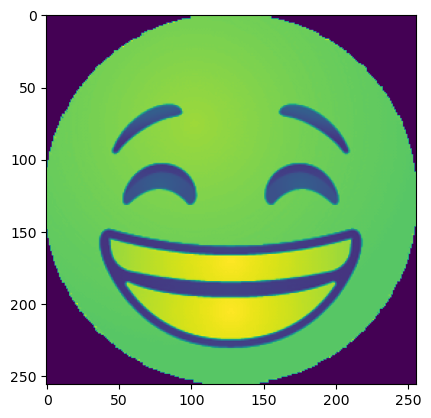

In [15]:
from PIL import ImageOps
real_image = ImageOps.grayscale(Image.open("smile.png"))
b_w_image = np.array(real_image)
plt.imshow(b_w_image)

In [167]:
symbol_count_from_res(256,256)

(1050, 105, 175)

In [152]:
font, line_height, symbols_per_row = get_font_and_related_dimensions('Courier Prime.ttf', generate_random_string(len(example_goal_string)), real_image.size[0])

In [164]:
example_goal_string = '@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@&&#BGP5YJJ??77!!!!!!!!!!!77?JJY5PGGB#&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@&#BG5YJ7!!~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~!7?JYPG#&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#BPY?!~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~!7J5GB&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#B5J7~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~^^^^^^~!7YPB&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@&#PY7~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~^^^^~!?5G&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#GY7~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~^^~!?5B&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@B5?~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~^^~!JP#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@&BY7~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~^~!?P#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#57~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~!?P&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@&P?~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~!YB&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@BY!^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~7P&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@BJ~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~!Y#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@G?~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~JB@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@G7^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~!YB@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@B?^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~!Y#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#J~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~~~!5&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@5!^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~?B@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@B?^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Y&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@P~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~7B@@@@@@@@@@@@@@@@@@@@@@@@@@&J^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^:^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!5@@@@@@@@@@@@@@@@@@@@@@@@B7^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!7?JYY55555Y?~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!JY55555YYJ?7!~^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Y&@@@@@@@@@@@@@@@@@@@@@G!^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!?Y5PPGGGGGGGGGGBP!::::::::::^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^?GGGGGGGGGGGGPP5J?!~^^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~?#@@@@@@@@@@@@@@@@@@@P~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!J5PGGGGGGGGGGPP5YJ?!^::::::::::::^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~7JY55PGGGGGGGGGGGP5?!~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~7B@@@@@@@@@@@@@@@@@P~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~?5GGGGGGGGGPY?7!~^^:::::::::::::::::^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~!7?J5PGGGGGGGGPY?~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~7B@@@@@@@@@@@@@@@P~^~^^^^^^^^^^^^^^^^^^^^^^^^^^^!YPGGGGBBGPJ7~^^:::^^^^^^::::::::::::::^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~!?YPGBBGGGGPJ~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~7#@@@@@@@@@@@@@G~^~~^^^^^^^^^^^^^^^^^^^^^^^^^~JGBBBBBG5?!^^^^^^^^^^^^^^^^:::::::::::::^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~7J5GBBBBBPJ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~7#@@@@@@@@@@@B!^~~~~^^^^^^^^^^^^^^^^^^^^^^^?GBBBBG5?~^^^^^^^^^^^^^^^^^^^^:::::::::::^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~!JPBBBBBP7~~~~~~~~~~~~~~~~~~~~~~~~~~~~?&@@@@@@@@@#7^~~~~~^^^^^^^^^^^^^^^^^^^^^~YB##BPJ~^^^^^^^^^^^^^^^^^^^^^^^^^::::::^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~^^~!YG###BJ~~~~~~~~~~~~~~~~~~~~~~~~~~~~Y@@@@@@@@@Y~~~~~~~^^^^^^^^^^^^^^^^^^^^!P##B57^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~^^~?P###5~~~~~~~~~~~~~~~~~~~~~~~~~~~!G@@@@@@@G~~~~~~~~^^^^^^^^^^^^^^^^^^^!P##57^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~^~?G##5~~~~~~~~~~~~~~~~~~~~~~~~~~~7#@@@@@&?~~~~~~~~~^^^^^^^^^^^^^^^^^^?GP?^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~^~JGP7~~~~~~~~~~~~~~~~~~~~~~~~~~~5@@@@@P~~~~~~~~~~^^^^^^^^^^^^^^^^^^^~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~7#@@@&?~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~^^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Y@@@G~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!7JY5PPPPPP5Y?!~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!7JY5PPPPPP5YJ7!~^^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~7&@@Y~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^~7YPBB##BBBBBBBB#BBG5J!^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~7YPBB##BBBBBBBB#BBBPY7~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!P@#7~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^!JGBBBBBGGGGGGGGGGGGBBBBB5!^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~?PBBBBBGGGGGGGGGGGBBBBBBP?~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Y@B~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^~JGBBBGGGGGGGGGGGGGGGGGGGGBBBY~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!5BBBGGGGGGGGGGGGGGGGGGGGBBBP?~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~?&P~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^!PBBGGGGGGGGGGGGGGGGGGGGGGGGGBB5~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!PBGGGGGGGGGGGGGGGGGGGGGGGGGGBBY~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!BY~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^7PBGGGGGGGGPP55YYYY5PPGGGGGGGGGGBJ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~5BGGGGGGGGGGP55YYYY55PGGGGGGGGBB5!~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~GJ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^!PBGGGGGP5J7!~~^^^^^^~!7J5PGGGGGGG5~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^7PGGGGGGGPY?7!~~~^^^~~!7?Y5GGGGGGBY~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~GJ~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^JGGGGPY?!^^^^^^^^^^^^^^^^^~?5GGGGGP~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^7GGGGGGY7~^^^^^^~~~~~~~^^~~!J5GGGGG7~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~5J~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^?GG5J!^^^^^^^^^^^^^^^^^^^^^^^!YGGP7^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~JPGPJ!^^^^^^^~~~~~~~~~~~~~~~~7YPGP7~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~5J~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^~!!~^^^^^^^^^^^^^^^^^^^^^^^^^^^!!~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!!!^^^^^^^~~~~~~~~~~~~~~~~~~~~!7!~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~GY~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~BP~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!BB!~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~?&#?~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Y@@Y~~~~~~~~~~~~~~~~~~~~~~~~^~7?7!!~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!7??7~~~~~~~~~~~~~~~~~~~~~~~~~!G@@G!~~~~~~~~~~~~~~~~~~~~~~~JG####BGP5YJ?!!~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!!7?JY5PGB###BP?~~~~~~~~~~~~~~~~~~~~~~~?&@@&?~~~~~~~~~~~~~~~~~~~~~~?B##BGGBB######BGPP5YJ??!!!~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~~~~~^~~~~^^^^^^~~~~~!!!7?JJY5PGBB######BGPG###G!~~~~~~~~~~~~~~~~~~~~~~5@@@@G!~~~~~~~~~~~~~~~~~~~~~5###B?^~!7?JY5PGBB######BBBGPP55YJ???77!!!~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^~~~~~!!!!7???JJY5PPGGBBB######BBGP5YJ7!~^:Y###B?~~~~~~~~~~~~~~~~~~~~~7#@@@@&J~~~~~~~~~~~~~~~~~~~~~Y####J:::::::::^~~!7?JY5PGGBBB########BBBBBGGGPP555555YYYYYYYYYYYYYYYY5555555PPGGGBBBBB########BBBGPP5YJ?7!~^^::::::::^5###B7~~~~~~~~~~~~~~~~~~~~~P@@@@@@B!~~~~~~~~~~~~~~~~~~~~7B###5^:::::::::::::...::::^~~!77?JYY55PPGGGBBBBBBBBBB#################BBBBBBBBBGGGGPP55YJJ?7!!~~^::::...:::::::::::::!G###G~~~~~~~~~~~~~~~~~~~~~?&@@@@@@@5~~~~~~~~~~~~~~~~~~~~~5###B?::::::::::::::::::...............:::::^^~~~~!~!!!!!!!!!!!!!!!!!!~~~~~~^^^:::::..............::::::::::::::::::^Y###B?~~~~~~~~~~~~~~~~~~~~!B@@@@@@@@&J~~~~~~~~~~~~~~~~~~~~!G###B?^::::::::::::::::::::................                                  .................::::::::::::::::::::^YB###5~~~~~~~~~~~~~~~~~~~~~P@@@@@@@@@@#7~~~~~~~~~~~~~~~~~~~~7G####P7^::::::::::::::::::.......................                     .......................::::::::::::::::::~?P####P!~~~~~~~~~~~~~~~~~~~~J&@@@@@@@@@@@B!~~~~~~~~~~~~~~~~~~~~?G####BGY7~^^::::................................                    .................................::::^^!?5G#####P!~~~~~~~~~~~~~~~~~~~~?&@@@@@@@@@@@@@G!~~~~~~~~~~~~~~~~~~~~7G#######BGGP5YJ?7!~^^:::........................                   ........................::^^~!77?JY5PGBB#######5!~~~~~~~~~~~~~~~~~~~~?#@@@@@@@@@@@@@@@G!~~~~~~~~~~~~~~~~~~~~7P###############BBBGGP55YJJ?77!~~^^:::::....                        .....::::^^^~!!7??JYY5PPGBBB################Y!~~~~~~~~~~~~~~~~~~~~?#@@@@@@@@@@@@@@@@@G7~~~~~~~~~~~~~~~~~~~~!5####P7?YPGB################BBBBBBGGGPPPP55YYYYYYYJJJJJJJJJJYYYYYYY555PPPGGGGBBBBB################BBP5J7?G###BJ~~~~~~~~~~~~~~~~~~~~~?&@@@@@@@@@@@@@@@@@@@B7~~~~~~~~~~~~~~~~~~~~~JB##G?:::^~7?Y5PGBBB######BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB######BBBGP5YJ7~^^:.^YB##G7~~~~~~~~~~~~~~~~~~~~~J&@@@@@@@@@@@@@@@@@@@@@#J~~~~~~~~~~~~~~~~~~~~~7P###5!::::::::^^!!7?JY5PPGGBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBGGPP5YJ?7!~^^::::::::^?G##BY!~~~~~~~~~~~~~~~~~~~~~5&@@@@@@@@@@@@@@@@@@@@@@@&5!~~~~~~~~~~~~~~~~~~~~~JB##BY~:::::::........:::^^^~!!7777???JJJJYYYYYYYYYYYYYYYYYYYJJJJ??777!!~~^^^::.........::::::::!5###P?~~~~~~~~~~~~~~~~~~~~~7G@@@@@@@@@@@@@@@@@@@@@@@@@@@G7~~~~~~~~~~~~~~~~~~~~~!5B##GJ^:::::::::..............                                       .............::::::::::!YB##GJ!~~~~~~~~~~~~~~~~~~~~~?#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#Y~~~~~~~~~~~~~~~~~~~~~~7YB##GJ~:.:::::......................                       ......................:::::.:!5B##GJ!~~~~~~~~~~~~~~~~~~~~~!P&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@G7~~~~~~~~~~~~~~~~~~~~~~7YB##BY!:...:.......................                     .......................:...^75B##GJ!~~~~~~~~~~~~~~~~~~~~~~J#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@&5!~~~~~~~~~~~~~~~~~~~~~~!JG##BP?~:........................                     ........................:!YG##BP?!~~~~~~~~~~~~~~~~~~~~~~7G@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#Y!~~~~~~~~~~~~~~~~~~~~~~!?5B##B5?~:.....................                     .....................:!JPB##GY7~~~~~~~~~~~~~~~~~~~~~~~75&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@BY!~~~~~~~~~~~~~~~~~~~~~~~!JPB##BPJ!^...................                  ...................:^7YGB##G5?!~~~~~~~~~~~~~~~~~~~~~~~!5&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@BJ!~~~~~~~~~~~~~~~~~~~~~~~~!J5GB##G5J!^:.................             .................:~7YPB##BG5?!~~~~~~~~~~~~~~~~~~~~~~~~75&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#57~~~~~~~~~~~~~~~~~~~~~~~~~!7YPGB##BP5J7~^:...                             ...:^!7J5GB##BG5J7!~~~~~~~~~~~~~~~~~~~~~~~~~7P&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@&P?~~~~~~~~~~~~~~~~~~~~~~~~~~~!7J5PBB##BBGPYJ?7!~^::::...........:::^^~!7?Y5PGB###BGPY?7!~~~~~~~~~~~~~~~~~~~~~~~~~~!JG&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@BY!~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!7?Y5PGBBB##BBBBGGPPPPPPPPPPPPGGGBBBB##BBGGPYJ?7!~~~~~~~~~~~~~~~~~~~~~~~~~~~~~75#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@&GJ!~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!!77?JYY55PPPGGGGGGGGGGGPPP55YJJ?77!~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~7YB&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#PJ!~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!!!!!!!!!!!~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~7YG&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@&GY7!~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!?5B&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@&BPJ7~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!7JP#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@&BPJ7!~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!?YG#&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@&#G5J7!~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!7J5B#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@&#BPY?7!~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!!7J5PB#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@&#BGP5J?77!!~~~~~~~~~~~~~~~~~~~~~~~~~~~~!!!7?JY5PB#&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@&##BGPP55YJJJJ???????JJJJY55PGGB#&&@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@'

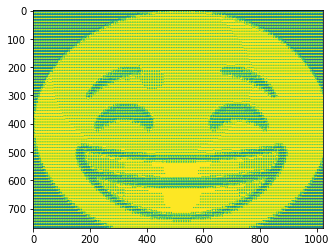

In [171]:
ascii_image = text_to_image(example_goal_string, 256*4, 256*3, font, line_height, 175)
plt.imshow(ascii_image)

In [141]:
bw = np.array(b_w)
bw.shape

(256, 256)

In [142]:
b_w.size

(256, 256)

EXPIREMENTS END HERE I GUESS








































In [ ]:
def get_target_image(filename):
  real_image = Image.open(filename)
  convert_to_black_and_white = lambda x : 1 if x > 128 else 0
  b_w_image = real_image.convert('L').point(convert_to_black_and_white, mode='1')
  b_w_image = np.array(b_w_image, dtype=int)
  return b_w_image

In [ ]:
def create_random_population(size, string_length):
    population = np.array([generate_random_string(string_length) for _ in range(size)])
    return population

In [149]:
# Testing random population creation
size = 100
target_image = get_target_image('smile.png')
print(target_image.shape)
ascii_length = resolution_to_string_length(*(target_image.shape))
print(ascii_length)

population = create_random_population(size, ascii_length)
population.shape

(256, 256)
1050


(100,)

In [ ]:
def mutate(individual):
    
    size = len(individual)

    mutated_part_size = np.random.randint(size / 20, size / 5) if np.random.random() < 0.1 else int(size / 100)
    mutated_part_start_index = np.random.randint(0, size - mutated_part_size)
    mutated_individual = individual[:mutated_part_start_index] +  generate_random_string(mutated_part_size) + individual[mutated_part_start_index + mutated_part_size:]

    return mutated_individual

**Explain your choice of implementation. Were there any other methods you considered but did not implement? Why?**

**Your answer**: I was experimenting with different ideas for mutation for a while, but in the end from my testing I can say that simply swapping the order of two random points worked the best.

Initially, I wanted to randomize swapping a bit to get some more varied orderings - for example I tried randomly swapping from one to 5 (10% of the overall points) pairs of points, but that brought worse accuracy. I was playing around with the percentages as well, but that didn't amount to much either. I believe swapping more than two points in an order was counterproductive because the more points we swap, the higher the chance of making the overall path longer.

I also tried increasing the amount of swaps as the "training" goes on, as eventually the ordering would settle and would not further improve. The idea was to experiment more when we have some relatively optimized solution already. That increased my results, but it was not enough. I also tried to increase the amount of pairs swapped exponentially, but that actually hurt the performance more than it helped.

I have also tried implementing simple inversion, inversion and scramble mutations, but also to no avail. I'm not sure exactly where did it go wrong, implementation was working correctly, but it's possible I have messed up when choosing the length of the subtours.

So to sum up, I'd say the main issue with coming up with proper seleciton method was hyperparameter tuning.


We also need a selection operator. **Think (or find from literature online) and implement a function that selects the same amount of individuals as was in the previous population.** There could be other setups, e.g. you select fewer parents at first, but later create as many offspring as needed, but for your code to work with the code that I have created, you have to select with replacement and have as many parents as there were individuals in the previous population. A small overview of selection operators can be found [here](https://www.tutorialspoint.com/genetic_algorithms/genetic_algorithms_parent_selection.htm).

The function must keep the two parameters (*population* and *fitness*) as specified below, but you can add more (give them default values!) or use global variables.

Remember that TSP is about minimizing, so if we are using fitness in selection, we want to prefer solutions with smaller fitness values rather than higher.

In [ ]:
import math

def select(population, fitnesses, percent=20):
    s_population = [s[0] for s in sorted([p for p in zip(population, fitnesses)], key=lambda x: x[1])]
    new_population = s_population[:int(np.floor((len(population) * percent)))-1] * int((1 / percent))
    new_population.extend(s_population[:len(population) - len(new_population)])    
    
    return new_population

The following class does the heavy lifting for you - you just need to provide the initial population and suitable functions.

**Run the following cell so you can use its contents later!**

In [153]:
def evaluate_ascii_string(eval_data):
  size = eval_data.target_image.shape
  ascii_image = text_to_image(eval_data.to_eval, size[1], size[0], eval_data.font, eval_data.line_height, eval_data.symbols_per_row)

  return mean_squared_error(ascii_image, eval_data.target_image)

from joblib import Parallel, delayed, cpu_count

def evaluate_ascii_strings(children, bare_eval_data):
  evaluation_data = []
  for child in children:
    data = copy.copy(bare_eval_data)
    data.to_eval = child
    evaluation_data.append(data)

  fitnesses = Parallel(n_jobs=cpu_count())(delayed(evaluate_ascii_string)(e) for e in evaluation_data)
  return fitnesses

In [ ]:
# there's a pil bug to convert images from bool array, this makes it grayscale first. Only needed to display, not compare.
def img_frombytes(data):
    size = data.shape[::-1]
    databytes = np.packbits(data, axis=1)
    return Image.frombytes(mode='1', size=size, data=databytes)

In [ ]:
class EvalData():
  def __init__(self, target_image, font, line_height, symbols_per_row) -> None:
     self.target_image = target_image
     self.font = font
     self.line_height = line_height
     self.symbols_per_row = symbols_per_row
     self.to_eval = None


def step(selection_function, crossover_function, mutation_function, population, fitnesses, fitness_history, eval_data):
    """
    Creates a new generation from the previous generation, using the operators
    provided during object creation. Also tracks the best fitness in every
    generation. Returns children and fitnesses.
    """
    selection = selection_function(population, fitnesses)
    children = selection if crossover_function is None else crossover_function(selection)
    children = [mutation_function(e) for e in children]
    children_fitnesses = evaluate_ascii_strings(children, eval_data)
    combined_population = np.append(np.array(population), np.array(children))
    combined_fitnesses = np.append(np.array(fitnesses), np.array(children_fitnesses))
    amount = len(population)
    indices_of_survivors = np.argpartition(combined_fitnesses, amount)[:amount]
    children = [e.tolist() for e in combined_population[indices_of_survivors]]
    fitnesses = [e.tolist() for e in combined_fitnesses[indices_of_survivors]]
    fitness_history.append(np.min(fitnesses))
    population = copy.copy(children)
    
    return population, fitnesses, fitness_history



In [144]:
def cut_point_crossover(population):

  # we have to shuffle the population as nearby orderings are the clones of each other
  np.random.shuffle(population)

  individual_length = len(population[0])
  # for every two parents, there should be two children
  new_population = []

  # implementation of alternating position crossover for a pair of parents.
  def crossover(a, b, individual_length):
    cut_point = np.random.randint(0, individual_length)
    children = [a[:cut_point] + b[cut_point:], b[:cut_point] + a[cut_point:]]
    return children

  # perform crossover twice per pair, alternating which parent to start with.
  for i in range(len(population) // 2):
    parent_a, parent_b = population[i], population[i+1]

    # only apply crossover for a percentage of the population
    if np.random.random() < 0.5:
      new_population += crossover(parent_a, parent_b, individual_length)
    else:
      new_population += [parent_a, parent_b]

  return new_population

In [154]:
target_image = get_target_image('smile.png')
ascii_length = resolution_to_string_length(*(target_image.shape))
font, line_height, symbols_per_row = get_font_and_related_dimensions('Courier Prime.ttf', generate_random_string(ascii_length), target_image.shape[1])

# Parameters for the experiment
MAX_NO_OF_ITERATIONS = 100
PRINT_EVERY_N_ITERATIONS = 10

eval_data = EvalData(target_image, font, line_height, symbols_per_row)
population = create_random_population(1000, ascii_length)
fitnesses = evaluate_ascii_strings(population, eval_data)
fitness_history = []


# Running the EA
for gen_no in tqdm(range(MAX_NO_OF_ITERATIONS)):
    population, fitnesses, fitness_history = step(select, cut_point_crossover, mutate, population, fitnesses, fitness_history, eval_data)

    if gen_no % PRINT_EVERY_N_ITERATIONS == 0:
        print(f"At generation {gen_no}. Best current fitness: {np.min(fitnesses)}")
        best_solution_index = np.argmin(fitnesses)
        best_solution = population[best_solution_index]
        solution_image = text_to_image(best_solution, target_image.shape[1], target_image.shape[0], font, line_height, symbols_per_row)
        ascii = img_frombytes(solution_image)
        plt.imshow(ascii)
        ascii.save(f"result_after_{gen_no}_iterations.jpeg")

# Printing and plotting results
best_solution_index = np.argmin(fitnesses)
best_solution = population[best_solution_index]
best_fitness = fitnesses[best_solution_index]
print(f"Best solution from EA: {best_fitness} MSE")

ascii = img_frombytes(text_to_image(best_solution, target_image.shape[1], target_image.shape[0], font, line_height, symbols_per_row))
plt.imshow(ascii)
ascii.save("result.jpeg")

42 symbols_per_row


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
def alternating_position_crossover(population):

  # we have to shuffle the population as nearby orderings are the clones of each other
  np.random.shuffle(population)

  individual_length = len(population[0])
  # for every two parents, there should be two children
  new_population = np.empty((len(population), len(population[0])), dtype=int)

  # implementation of alternating position crossover for a pair of parents.
  def crossover(a, b):
    child = []
    j = k = 0
    take_from_a = True
    while len(child) != individual_length:
      if take_from_a:
        next_value = a[j] 
        j += 1
      else:
        next_value = b[k]
        k += 1
      
      if next_value not in child:
        child.append(next_value)

    return child

  # perform crossover twice per pair, alternating which parent to start with.
  for i in range(len(population) // 2):
    parent_a, parent_b = population[i], population[i+1]

    # only apply crossover for a percentage of the population
    if np.random.random() < 0.05:
      new_population[i] = crossover(parent_a, parent_b)
      new_population[i + 1] = crossover(parent_b, parent_a)
    else:
      new_population[i] = parent_a
      new_population[i + 1] = parent_b

  return new_population

Code below partly copied from above, with crossover added

Using random seed 5075


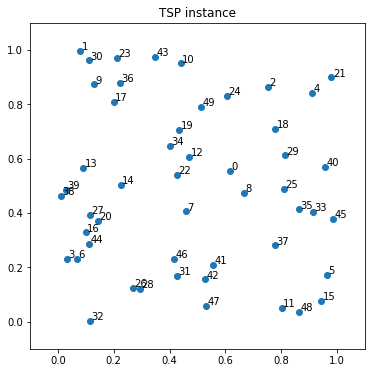

At generation 0. Best current fitness: 22.297382616675918
At generation 100. Best current fitness: 10.519996287368752
At generation 200. Best current fitness: 9.176255830178146
At generation 300. Best current fitness: 8.784117240533792
At generation 400. Best current fitness: 8.539421074203752
At generation 500. Best current fitness: 8.393054064999516
At generation 600. Best current fitness: 8.393054064999516
At generation 700. Best current fitness: 8.317469440636668
At generation 800. Best current fitness: 8.254953495082825
At generation 900. Best current fitness: 8.254953495082825
Best solution from EA: 8.244206593251826 distance, [46, 42, 41, 48, 11, 47, 31, 28, 26, 32, 3, 6, 0, 8, 35, 33, 29, 21, 4, 40, 45, 5, 15, 37, 25, 18, 2, 36, 17, 14, 20, 44, 16, 27, 38, 39, 13, 9, 1, 30, 23, 43, 10, 24, 49, 19, 34, 12, 22, 7]
Best from greedy algorithm: 6.653219277529493 distance, [13, 39, 38, 27, 20, 16, 44, 6, 3, 32, 26, 28, 31, 46, 42, 41, 47, 11, 48, 15, 5, 45, 33, 35, 25, 29, 18, 2, 24,

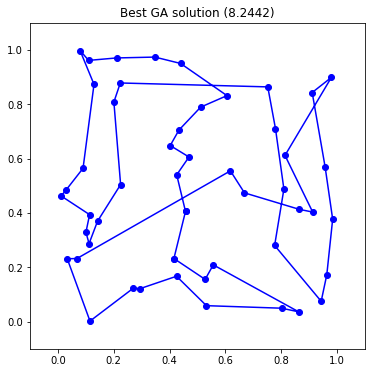

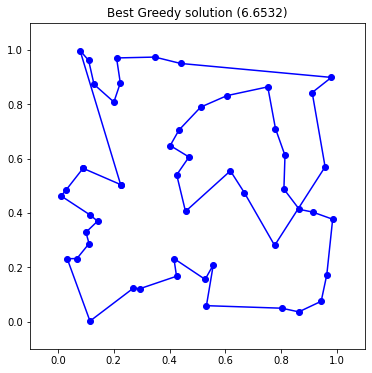

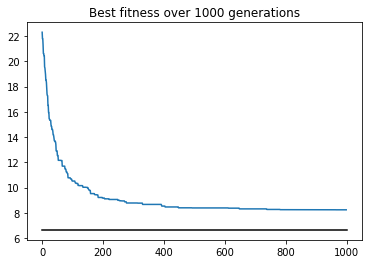

The best greedy algorithm solution is 80.70% better than yours.


In [ ]:
# Travelling Salesman Problem parameters and setup
tsp = TSP(NODES)
tsp.plot(show_order=True, title='TSP instance')

# Parameters for the experiment
MAX_NO_OF_ITERATIONS = 1000
PRINT_EVERY_N_ITERATIONS = 100
initial_population = create_random_population(500, NODES)

# TODO: provide the operators you have created down below!
ea = EvolutionWrapper(initial_population,
                      selection_fn=select, 
                      mutation_fn=mutate, 
                      # CROSSOVER ADDED HERE
                      crossover_fn= alternating_position_crossover,
                      evaluation_fn=tsp.evaluate)

# Running the EA
for gen_no in range(MAX_NO_OF_ITERATIONS):
    population, fitnesses = ea.step()
    if gen_no % PRINT_EVERY_N_ITERATIONS == 0:
        print(f"At generation {gen_no}. Best current fitness: {np.min(fitnesses)}")

# Printing and plotting results
best_solution_index = np.argmin(fitnesses)
best_solution = population[best_solution_index]
best_fitness = fitnesses[best_solution_index]
print(f"Best solution from EA: {best_fitness} distance, {best_solution}")
print(f"Best from greedy algorithm: {best_greedy_fitness} distance, {best_greedy_solution}")

tsp.plot(best_solution, title=f'Best GA solution ({best_fitness:.4f})')
tsp.plot(best_greedy_solution, title=f'Best Greedy solution ({best_greedy_fitness:.4f})')

plt.plot(range(len(ea.fitness_history)), ea.fitness_history)
plt.plot((0, len(ea.fitness_history)), (best_greedy_fitness, best_greedy_fitness), 'k-')
plt.title(f"Best fitness over {MAX_NO_OF_ITERATIONS} generations")
plt.show()

if best_greedy_fitness < best_fitness:
    print(f"The best greedy algorithm solution is {(best_greedy_fitness/best_fitness * 100):.2f}% better than yours.")
else:
    print(f"Your solution is {((best_greedy_fitness/best_fitness * 100)-100):.2f}% better than the greedy algorithm. Good job!")

**Explain your thought process and experiments. What did you try and what lead to improvement? Did you manage to beat the greedy baseline? What combination of operators and heuristics did the trick? If you implemented crossover, how does crossover complement mutation and why mutation on its own is not enough?**

**Your answer:** 

After implementing crossover and not achieving any better results, I also experimented with applying crossover only to a part of the population (and played with the ratios for quite a bit) and still, the best result ended up being not using crossover at all. 

I believe the ideal situation would be where the algorithm prioritizes shorter distances, but randomizes the solutions enough to learn some better point arrangements. I have a suspicion that it currently get's stuck on some suboptimal solution, and it changes the ordering a bit to try and find something better, but in the end it's not different enough to be more efficient. I believe these various techniques should try and help with this, but in practice after playing with the hyperparameters for longer than I'd like to admit, I still didn't get anywhere. 

In the end I am conflicted - I feel that the solution is very close, but I cannot reach the last step to get the "magic" combination of methods and hyperparameters.

**Finally, please provide some feedback**:
- How long did the assigment take?
- Was it easy, medium, or difficult? 
- Did you have prior knowledge of EAs, programming in Python?

**Your answer:**...
- Probably around 2-3 hours of reading and coding, but maybe twice as much if we consider the downtime of waiting for the results of the algorithm.
- I don't want to say it's difficult in general, but in the end I could not find a suitable solution so I guess it is.
- I do have prior knowledge in python, not so much in evolutionary algorithms.
